<a href="https://colab.research.google.com/github/ayachiii/Flow_study/blob/main/physio_questionnaire_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 本文の考察4.3のためのコードである。

# FC3,FCz,bpm,lf_nuとアンケート結果の相関
# スピアマンの順位相関関係を使用する

分析対象データ数: 40 サンプル


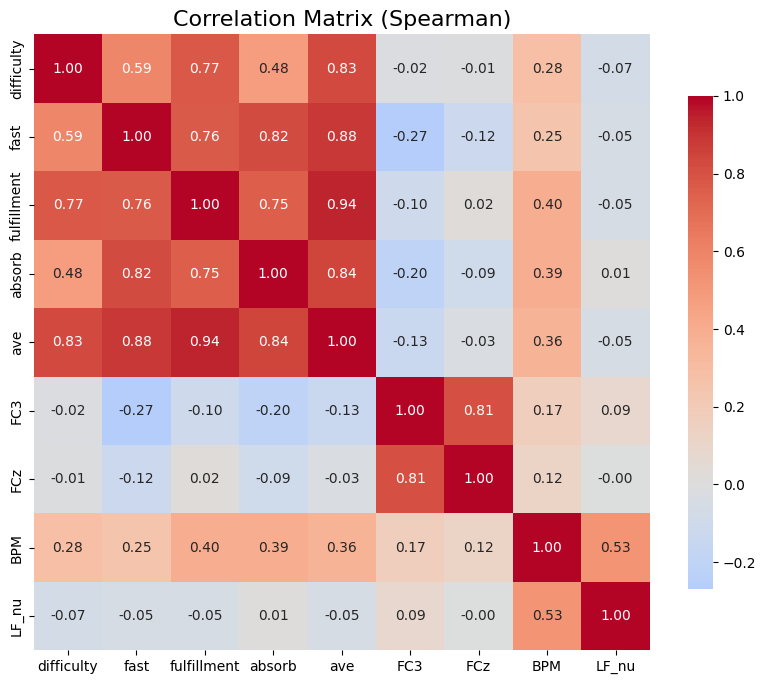


=== 有意な相関ランキング (p < 0.05) ===
                 pair         r         p
10  fulfillment x BPM  0.395715  0.011489
14       absorb x BPM  0.394480  0.011773
18          ave x BPM  0.363689  0.021063
2    difficulty x BPM  0.284511  0.075187
4          fast x FC3 -0.268349  0.094084


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


df_pli = pd.read_csv('all_pli_data.csv')
df_pli.columns = [c.strip() for c in df_pli.columns]


df_survey = pd.read_csv('all_survey.csv')
df_survey.columns = [c.strip() for c in df_survey.columns]


df_hrv = pd.read_csv('all_hrv_data.csv')
df_hrv.columns = [c.strip() for c in df_hrv.columns]

# 文字列の空白除去
df_pli['SubjectName'] = df_pli['SubjectName'].str.strip()
df_survey['SubjectName'] = df_survey['SubjectName'].str.strip()
# if 'df_hrv' in locals(): df_hrv['SubjectName'] = df_hrv['SubjectName'].str.strip()


df_merged = pd.merge(df_pli, df_survey, on=['SubjectName', 'Phase'])


df_merged = pd.merge(df_merged, df_hrv, on=['SubjectName', 'Phase'])

print(f"分析対象データ数: {len(df_merged)} サンプル")


target_cols = [
    # アンケート項目 (縦軸候補)
    'difficulty', 'fast', 'fulfillment', 'absorb', 'ave',
    # 生理指標 (横軸候補
    'FC3', 'FCz', 'FC4'
    'RMSSD', 'BPM', 'LF_nu'
]


valid_cols = [c for c in target_cols if c in df_merged.columns]
corr_matrix = df_merged[valid_cols].corr(method='spearman')


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f',
            square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix (Spearman)', fontsize=16)
plt.show()


print("\n=== 有意な相関ランキング (p < 0.05) ===")
results = []
survey_items = ['difficulty', 'fast', 'fulfillment', 'absorb', 'ave']
physio_items = [c for c in valid_cols if c not in survey_items]

for s_item in survey_items:
    for p_item in physio_items:
        if s_item in df_merged.columns and p_item in df_merged.columns:
            r, p = stats.spearmanr(df_merged[s_item], df_merged[p_item])
            results.append({'pair': f"{s_item} x {p_item}", 'r': r, 'p': p})

# p値が小さい順に並べ替え
results_df = pd.DataFrame(results).sort_values('p')
print(results_df[results_df['p'] < 0.1]) # p<0.1 まで表示

# brain,HRVにおいてすべての指標とアンケート結果の相関を出した
# スポアマンの順位相関係数

✅ 分析対象データ数: 40 サンプル

 🏆 🧠 脳波 (EEG) 相関の強さランキング (Top 10)
    ※ Rの絶対値が大きい順 (プラス/マイナス混合)
     Survey Physio         R  p-value Sig
       fast     O1 -0.324642 0.040969   *
     absorb     O1 -0.312192 0.049856   *
       fast     O2 -0.303580 0.056866   †
     absorb     O2 -0.289784 0.069712   †
fulfillment     O1 -0.279564 0.080624   †
       fast    FC3 -0.268349 0.094084   †
        ave     O1 -0.245896 0.126151    
        ave     O2 -0.230745 0.152002    
 difficulty    Fp2 -0.203429 0.208025    
     absorb    FC3 -0.201010 0.213600    

----------------------------------------------------------------------
 🔢 🧠 脳波 (EEG) 全組み合わせ R値 一覧表
----------------------------------------------------------------------
Physio         FC3    FC4    FCz    Fp2    FpZ     O1     O2
Survey                                                      
absorb      -0.201 -0.044 -0.093 -0.093 -0.053 -0.312 -0.290
ave         -0.130  0.044 -0.027 -0.183 -0.042 -0.246 -0.231
difficulty  -0.018  0.102 -0.008 -0.20

/tmp/ipython-input-1549853979.py:101: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1549853979.py:101: UserWarning: Glyph 33075 (\N{CJK UNIFIED IDEOGRAPH-8133}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1549853979.py:101: UserWarning: Glyph 27874 (\N{CJK UNIFIED IDEOGRAPH-6CE2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33075 (\N{CJK UNIFIED IDEOGRAPH-8133}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27874 (\N{CJK UNIFIED IDEOGRAPH-6CE2}) missing from font(s) DejaVu Sans.
  fig.canva

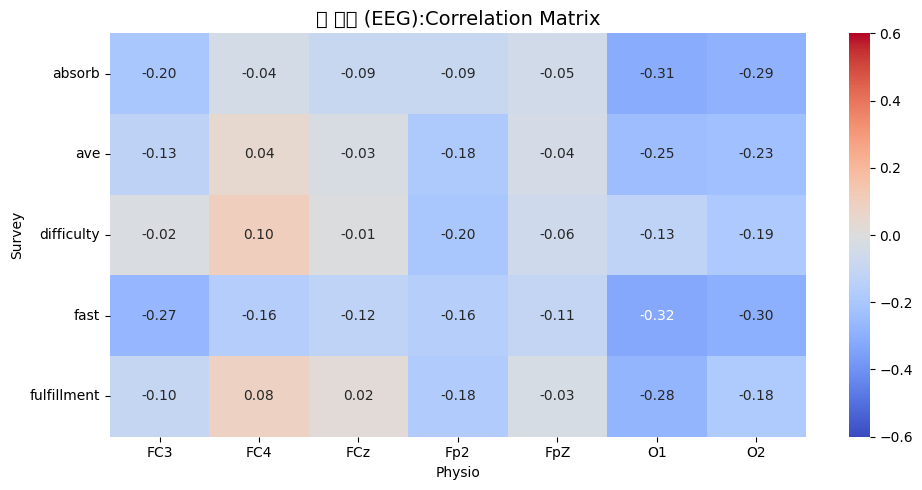


 🏆 ❤️ 心拍 (HRV) 相関の強さランキング (Top 10)
    ※ Rの絶対値が大きい順 (プラス/マイナス混合)
     Survey Physio         R  p-value Sig
fulfillment    bpm  0.395715 0.011489   *
fulfillment    ibi -0.395715 0.011489   *
     absorb    ibi -0.394480 0.011773   *
     absorb    bpm  0.394480 0.011773   *
        ave    bpm  0.363689 0.021063   *
        ave    ibi -0.363689 0.021063   *
 difficulty     lf -0.308633 0.052664   †
       fast     lf -0.306271 0.054596   †
        ave     lf -0.289709 0.069788   †
 difficulty    ibi -0.284511 0.075187   †

----------------------------------------------------------------------
 🔢 ❤️ 心拍 (HRV) 全組み合わせ R値 一覧表
----------------------------------------------------------------------
Physio         bpm     hf  hf_nu    ibi     lf  lf/hf  lf_nu  pnn50  rmssd  \
Survey                                                                       
absorb       0.394 -0.172 -0.011 -0.394 -0.252  0.011  0.011 -0.063 -0.006   
ave          0.364 -0.161  0.051 -0.364 -0.290 -0.051 -0.051 -0.08

/tmp/ipython-input-1549853979.py:101: UserWarning: Glyph 24515 (\N{CJK UNIFIED IDEOGRAPH-5FC3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1549853979.py:101: UserWarning: Glyph 25293 (\N{CJK UNIFIED IDEOGRAPH-62CD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24515 (\N{CJK UNIFIED IDEOGRAPH-5FC3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25293 (\N{CJK UNIFIED IDEOGRAPH-62CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


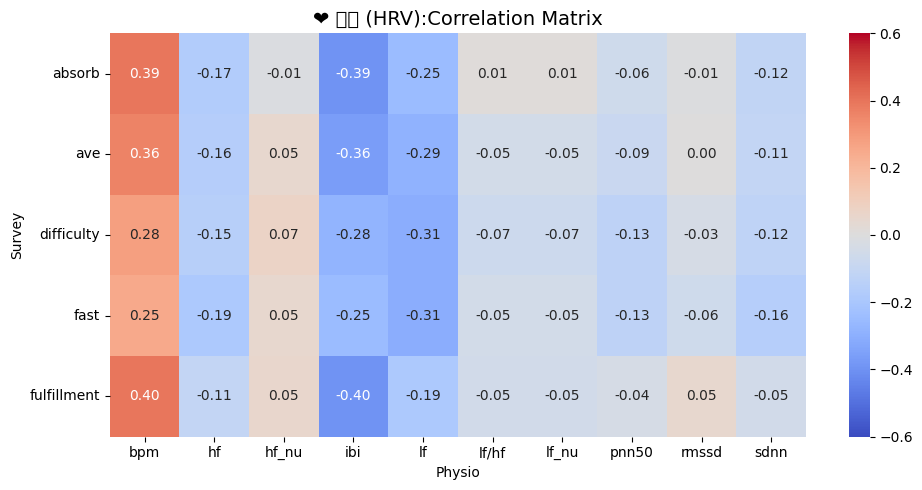

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


file_survey = 'all_survey.csv'
file_hrv    = 'all_hrv_data_2.csv'
file_brain  = 'all_brain_data.csv'

# 読み込み
df_survey = pd.read_csv(file_survey)
df_hrv    = pd.read_csv(file_hrv)
df_brain  = pd.read_csv(file_brain)

# 前処理（空白除去）
for df in [df_survey, df_hrv, df_brain]:
    df.columns = [c.strip() for c in df.columns]
    if 'SubjectName' in df.columns:
        df['SubjectName'] = df['SubjectName'].astype(str).str.strip()

# 結合
df_merged = pd.merge(df_survey, df_hrv, on=['SubjectName', 'Phase'])
df_merged = pd.merge(df_merged, df_brain, on=['SubjectName', 'Phase'])

print(f"✅ 分析対象データ数: {len(df_merged)} サンプル")


# アンケート (Y軸)
survey_cols = ['difficulty', 'fast', 'fulfillment', 'absorb', 'ave']

# 脳波 (EEG)
eeg_cols = ['FpZ', 'FC3', 'FC4', 'FCz', 'O1', 'O2', 'Fp2']

# 心拍 (HRV)
hrv_cols = ['bpm', 'ibi', 'sdnn', 'rmssd', 'pnn50', 'lf', 'hf', 'lf/hf', 'lf_nu', 'hf_nu']

# データにあるものだけ抽出（エラー回避）
eeg_targets = [c for c in eeg_cols if c in df_merged.columns]
hrv_targets = [c for c in hrv_cols if c in df_merged.columns]

def analyze_and_report(df, physio_list, category_name):
    if not physio_list:
        print(f"\n⚠️ {category_name} のデータが見つかりません。")
        return

    results = []

    # --- 全組み合わせ計算 ---
    for s in survey_cols:
        for p in physio_list:
            r, p_val = stats.spearmanr(df[s], df[p], nan_policy='omit')

            sig = ""
            if p_val < 0.01: sig = "**"
            elif p_val < 0.05: sig = "*"
            elif p_val < 0.1: sig = "†"

            results.append({
                'Survey': s,
                'Physio': p,
                'R': r,
                'Abs_R': abs(r),  # 並び替え用（絶対値）
                'p-value': p_val,
                'Sig': sig
            })

    df_res = pd.DataFrame(results)

    # --- ① ランキング表示 (相関の強さ順) ---
    df_ranked = df_res.sort_values('Abs_R', ascending=False)

    print("\n" + "="*70)
    print(f" 🏆 {category_name} 相関の強さランキング (Top 10)")
    print("    ※ Rの絶対値が大きい順 (プラス/マイナス混合)")
    print("="*70)
    # 表示設定
    pd.set_option('display.max_rows', None)
    print(df_ranked[['Survey', 'Physio', 'R', 'p-value', 'Sig']].head(10).to_string(index=False))

    # --- ② マトリックス表 (一覧) ---
    matrix = df_res.pivot(index='Survey', columns='Physio', values='R')

    print("\n" + "-"*70)
    print(f" 🔢 {category_name} 全組み合わせ R値 一覧表")
    print("-" * 70)
    print(matrix.round(3))

    # --- ③ ヒートマップ描画 ---
    plt.figure(figsize=(10, 5))
    sns.heatmap(matrix, annot=True, cmap='coolwarm', center=0, vmin=-0.6, vmax=0.6, fmt='.2f')
    plt.title(f'{category_name}:Correlation Matrix', fontsize=14)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


# ① 脳波 (EEG) の分析
analyze_and_report(df_merged, eeg_targets, "🧠 脳波 (EEG)")

# ② 心拍 (HRV) の分析
analyze_and_report(df_merged, hrv_targets, "❤️ 心拍 (HRV)")

✅ 分析対象データ数: 40 サンプル

🚀 エクセルファイル 'correlation_results.xlsx' を作成中...

 💾 🧠 脳波 (EEG) の結果をExcelに書き込みました: EEG_Ranking, EEG_Matrix


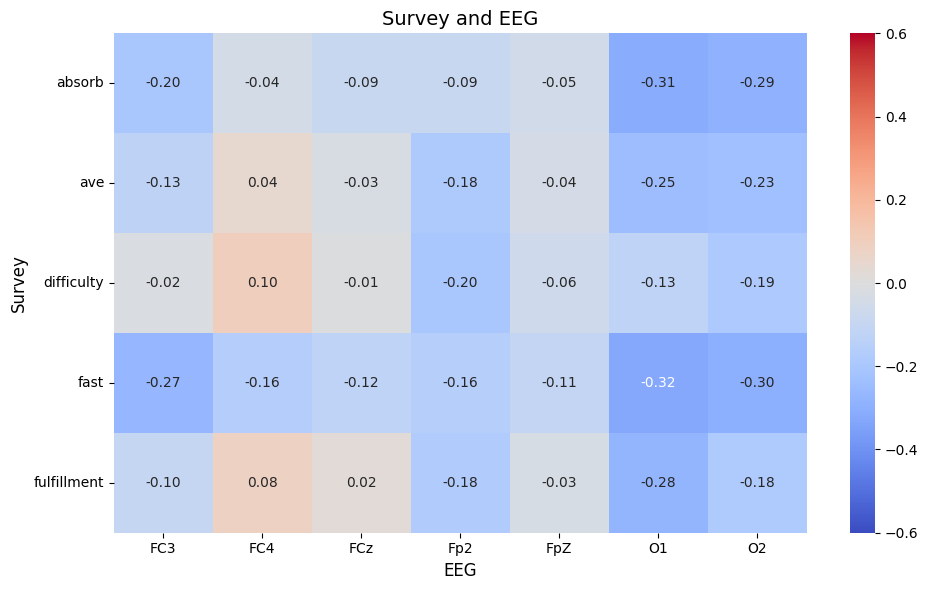


 💾 ❤️ 心拍 (HRV) の結果をExcelに書き込みました: HRV_Ranking, HRV_Matrix


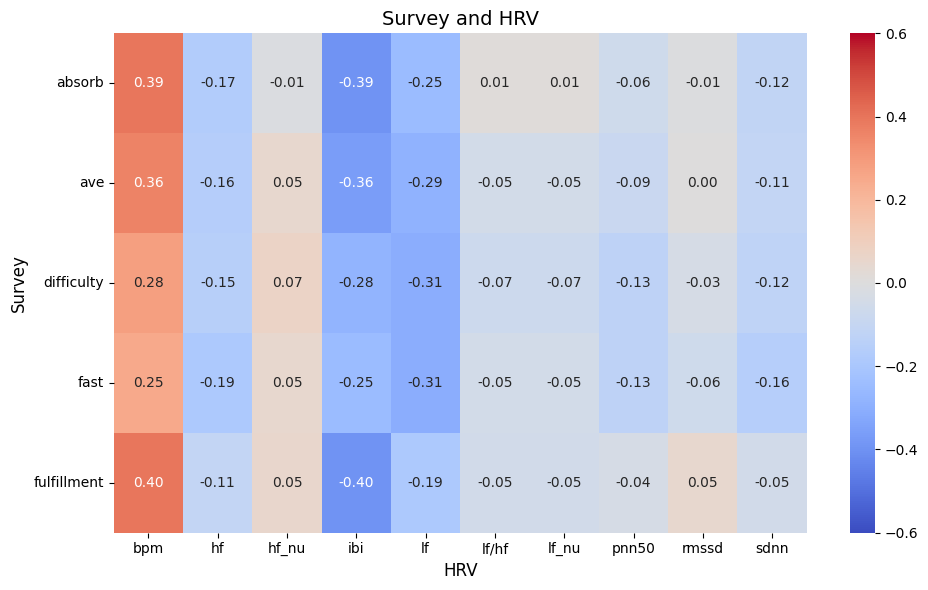


✅ すべての処理が完了しました。 'correlation_results.xlsx' を確認してください。


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


plt.rcParams['font.family'] = 'MS Gothic'

file_survey = 'all_survey.csv'
file_hrv    = 'all_hrv_data_2.csv'
file_brain  = 'all_brain_data.csv'

# 読み込み
df_survey = pd.read_csv(file_survey)
df_hrv    = pd.read_csv(file_hrv)
df_brain  = pd.read_csv(file_brain)

# 前処理（空白除去）
for df in [df_survey, df_hrv, df_brain]:
    df.columns = [c.strip() for c in df.columns]
    if 'SubjectName' in df.columns:
        df['SubjectName'] = df['SubjectName'].astype(str).str.strip()

# 結合
df_merged = pd.merge(df_survey, df_hrv, on=['SubjectName', 'Phase'])
df_merged = pd.merge(df_merged, df_brain, on=['SubjectName', 'Phase'])

print(f"✅ 分析対象データ数: {len(df_merged)} サンプル")


# アンケート (Y軸)
survey_cols = ['difficulty', 'fast', 'fulfillment', 'absorb', 'ave']

# 脳波 (EEG)
eeg_cols = ['FpZ', 'FC3', 'FC4', 'FCz', 'O1', 'O2', 'Fp2']

# 心拍 (HRV)
hrv_cols = ['bpm', 'ibi', 'sdnn', 'rmssd', 'pnn50', 'lf', 'hf', 'lf/hf', 'lf_nu', 'hf_nu']

# データにあるものだけ抽出
eeg_targets = [c for c in eeg_cols if c in df_merged.columns]
hrv_targets = [c for c in hrv_cols if c in df_merged.columns]

def analyze_and_save(df, physio_list, category_name, writer, sheet_prefix):
    """
    相関分析を行い、結果をExcelの各シートに保存・描画する関数
    """
    if not physio_list:
        print(f"\n⚠️ {category_name} のデータが見つかりません。")
        return

    results = []

    # --- 全組み合わせ計算 ---
    for s in survey_cols:
        for p in physio_list:
            r, p_val = stats.spearmanr(df[s], df[p], nan_policy='omit')

            sig = ""
            if p_val < 0.01: sig = "**"
            elif p_val < 0.05: sig = "*"
            elif p_val < 0.1: sig = "†"

            results.append({
                'Survey': s,
                'Physio': p,
                'R': r,
                'Abs_R': abs(r),  # 並び替え用
                'p-value': p_val,
                'Sig': sig
            })

    df_res = pd.DataFrame(results)

    # --- ① ランキング作成 ---
    df_ranked = df_res.sort_values('Abs_R', ascending=False)
    sheet_rank = f"{sheet_prefix}_Ranking"
    df_ranked[['Survey', 'Physio', 'R', 'p-value', 'Sig']].to_excel(writer, sheet_name=sheet_rank, index=False)

    # --- ② マトリックス作成 ---
    matrix = df_res.pivot(index='Survey', columns='Physio', values='R')
    sheet_matrix = f"{sheet_prefix}_Matrix"
    matrix.to_excel(writer, sheet_name=sheet_matrix)

    print("\n" + "="*70)
    print(f"  {category_name} の結果をExcelに書き込みました: {sheet_rank}, {sheet_matrix}")
    print("="*70)

    # --- ③ ヒートマップ描画 (ここを修正) ---
    plt.figure(figsize=(10, 6))
    sns.heatmap(matrix, annot=True, cmap='coolwarm', center=0, vmin=-0.6, vmax=0.6, fmt='.2f')

    # タイトルと横軸ラベルの分岐設定
    if sheet_prefix == "EEG":
        plot_title = "Survey and EEG"
        x_label = "EEG"
    elif sheet_prefix == "HRV":
        plot_title = "Survey and HRV"
        x_label = "HRV"
    else:
        plot_title = f"{category_name} Correlation Matrix"
        x_label = category_name

    # タイトルとラベルを適用
    plt.title(plot_title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)  # 横軸ラベルを追加
    plt.ylabel("Survey", fontsize=12) # 縦軸ラベルも明記
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


output_filename = 'correlation_results.xlsx'

print(f"\n🚀 エクセルファイル '{output_filename}' を作成中...")

with pd.ExcelWriter(output_filename) as writer:
    # 脳波 (EEG)
    analyze_and_save(df_merged, eeg_targets, "🧠 脳波 (EEG)", writer, "EEG")

    # 心拍 (HRV)
    analyze_and_save(df_merged, hrv_targets, "❤️ 心拍 (HRV)", writer, "HRV")

print(f"\n✅ すべての処理が完了しました。 '{output_filename}' を確認してください。")

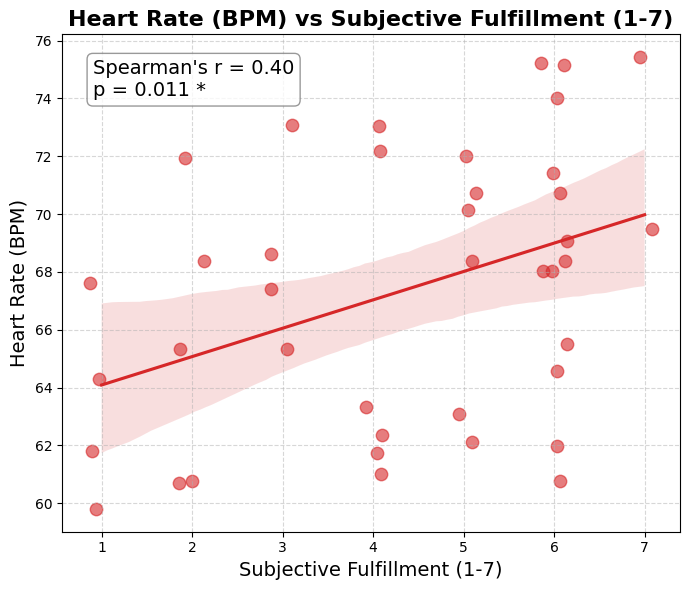

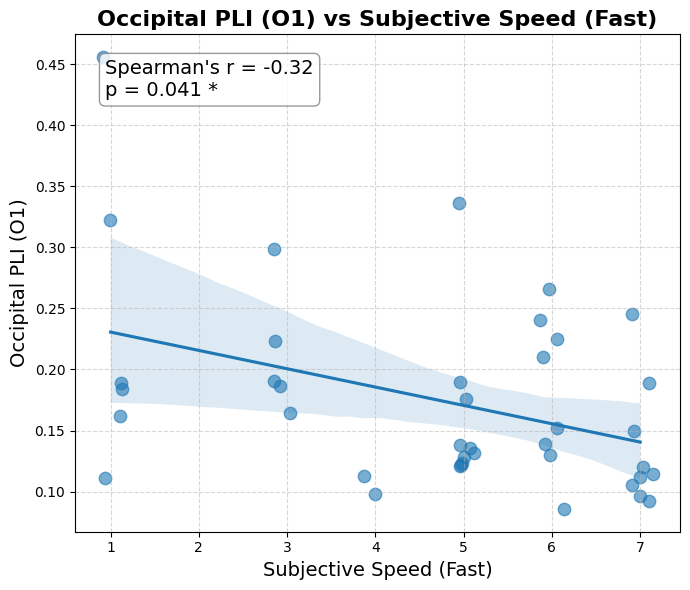

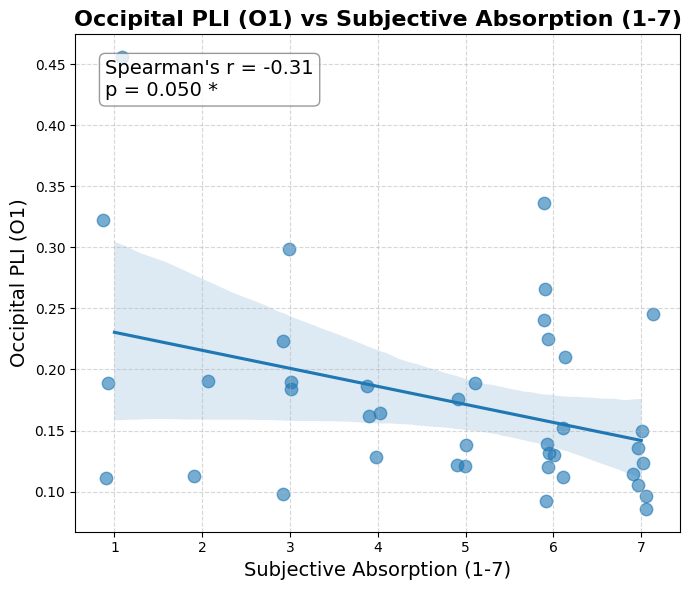

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


# ファイル読み込み
df_survey = pd.read_csv('all_survey.csv')
df_hrv    = pd.read_csv('all_hrv_data_2.csv')
df_brain  = pd.read_csv('all_brain_data.csv')

# 前処理
for df in [df_survey, df_hrv, df_brain]:
    df.columns = [c.strip() for c in df.columns]
    if 'SubjectName' in df.columns:
        df['SubjectName'] = df['SubjectName'].astype(str).str.strip()

# 結合
df_merged = pd.merge(df_survey, df_hrv, on=['SubjectName', 'Phase'])
df_merged = pd.merge(df_merged, df_brain, on=['SubjectName', 'Phase'])

def plot_scatter_with_stats(df, x_col, y_col, x_label, y_label, color):
    # スピアマン相関の計算
    r, p = stats.spearmanr(df[x_col], df[y_col], nan_policy='omit')

    # グラフ描画
    plt.figure(figsize=(7, 6))

    # 散布図 + 回帰直線
    # x_jitter: アンケートの点数が重ならないように少しずらす設定
    sns.regplot(data=df, x=x_col, y=y_col, color=color,
                x_jitter=0.15, scatter_kws={'alpha':0.6, 's':80})

    # 統計量をグラフ内に書き込む
    stats_text = f"Spearman's r = {r:.2f}\np = {p:.3f}"
    if p < 0.05:
        stats_text += " *"

    # テキスト配置 (グラフの左上または右上)
    plt.gca().text(0.05, 0.95, stats_text, transform=plt.gca().transAxes,
                   fontsize=14, verticalalignment='top',
                   bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.title(f"{y_label} vs {x_label}", fontsize=16, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()




plot_scatter_with_stats(df_merged,
                        x_col='fulfillment', y_col='bpm',
                        x_label='Subjective Fulfillment (1-7)',
                        y_label='Heart Rate (BPM)',
                        color='#d62728') # 赤色

plot_scatter_with_stats(df_merged,
                        x_col='fast', y_col='O1',
                        x_label='Subjective Speed (Fast)',
                        y_label='Occipital PLI (O1)',
                        color='#1f77b4') # 青色

plot_scatter_with_stats(df_merged,
                        x_col='absorb', y_col='O1',
                        x_label='Subjective Absorption (1-7)',
                        y_label='Occipital PLI (O1)',
                        color='#1f77b4') # 青色

# スピアマンとピアソンの比較


In [ ]:
import pandas as pd
from scipy import stats


file_survey = 'all_survey.csv'
file_hrv    = 'all_hrv_data_2.csv'
file_brain  = 'all_brain_data.csv'

df_survey = pd.read_csv(file_survey)
df_hrv    = pd.read_csv(file_hrv)
df_brain  = pd.read_csv(file_brain)

for df in [df_survey, df_hrv, df_brain]:
    df.columns = [c.strip() for c in df.columns]
    if 'SubjectName' in df.columns:
        df['SubjectName'] = df['SubjectName'].astype(str).str.strip()

df_merged = pd.merge(df_survey, df_hrv, on=['SubjectName', 'Phase'])
df_merged = pd.merge(df_merged, df_brain, on=['SubjectName', 'Phase'])


survey_cols = ['difficulty', 'fast', 'fulfillment', 'absorb', 'ave']

# 脳波と心拍をまとめる
targets = [
    'FpZ', 'FC3', 'FC4', 'FCz', 'O1', 'O2', 'Fp2',  # Brain
    'bpm', 'ibi', 'sdnn', 'rmssd', 'pnn50', 'lf', 'hf', 'lf/hf' # Heart
]
valid_targets = [c for c in targets if c in df_merged.columns]


results = []

for s in survey_cols:
    for t in valid_targets:
        # スピアマン (順位)
        r_s, p_s = stats.spearmanr(df_merged[s], df_merged[t], nan_policy='omit')

        # ピアソン (積率・直線)
        r_p, p_p = stats.pearsonr(df_merged[s], df_merged[t]) # nan_policyは省略(dropna必要かもだが今回は簡易に)

        # 有意判定マーク
        def get_sig(p):
            if p < 0.01: return "**"
            if p < 0.05: return "*"
            if p < 0.1: return "†"
            return ""

        # どちらかで有意傾向(p<0.1)が出ているものだけリストアップ
        if p_s < 0.1 or p_p < 0.1:
            results.append({
                'Survey': s,
                'Physio': t,
                'Spearman_R': r_s,
                'Spearman_p': p_s,
                'S_Sig': get_sig(p_s),
                'Pearson_R': r_p,
                'Pearson_p': p_p,
                'P_Sig': get_sig(p_p),
                'Diff': abs(r_s - r_p) # R値のズレ
            })

df_compare = pd.DataFrame(results)

# 見やすいように並べ替え (スピアマンのp値が良い順)
df_compare = df_compare.sort_values('Spearman_p')

print("\n" + "="*80)
print("⚔️ スピアマン vs ピアソン 徹底比較 (どちらかで p<0.1 のみ表示)")
print("="*80)
# 表示設定
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# 小数点を丸めて表示
print(df_compare.round(3).to_string(index=False))


⚔️ スピアマン vs ピアソン 徹底比較 (どちらかで p<0.1 のみ表示)
     Survey Physio  Spearman_R  Spearman_p S_Sig  Pearson_R  Pearson_p P_Sig  Diff
fulfillment    bpm       0.396       0.011     *      0.385      0.014     * 0.011
fulfillment    ibi      -0.396       0.011     *     -0.384      0.014     * 0.012
     absorb    ibi      -0.394       0.012     *     -0.367      0.020     * 0.028
     absorb    bpm       0.394       0.012     *      0.364      0.021     * 0.030
        ave    bpm       0.364       0.021     *      0.366      0.020     * 0.002
        ave    ibi      -0.364       0.021     *     -0.367      0.020     * 0.004
       fast     O1      -0.325       0.041     *     -0.389      0.013     * 0.065
     absorb     O1      -0.312       0.050     *     -0.370      0.019     * 0.057
 difficulty     lf      -0.309       0.053     †     -0.144      0.376       0.165
       fast     lf      -0.306       0.055     †      0.020      0.902       0.326
       fast     O2      -0.304       0.057   